In [1]:
import numpy as np
np.set_printoptions(precision=3)
np.random.seed(20221110)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats

# Sampling

The goal of sampling is to do statistics. This means, to estimate the population parameters from 
a randomly sampled subgroup from the population. 

Let's start with an example:

## Estimate the number of cells in a well-mixed bacterial culture. 



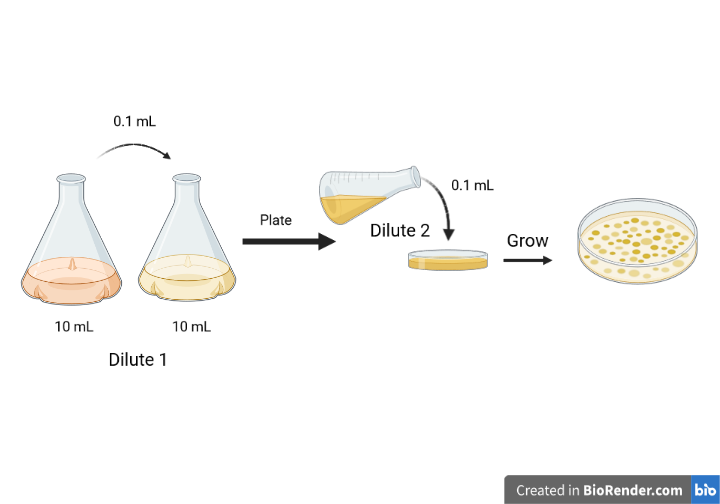














The questions we are trying to answer with Statistics:

    1. How many trials should one do?
    2. How do we report the results?
    3. How confident are we about the results?

## Another example: Population study

Find out how many in a population have a disease, and how many are healthy.

Let's say we have a population of 10,000 people, and we sample 100. 

Let the result be 63 healthy, 37 with disease. How do we report the results? Can we say 63% in the population are healthy and 37% have the disease?

The type of questions we ask in Statistics, for example, how many individuals should we sample to get an error of 1%.

What does it mean having an error of 1%?

Coefficient of variance for example is one way to quantify the error of sampling. 


## Main goal of Statistics: Inference about the population from samples

    1. Estimation of values of (population) parameters
    2. Testing a hypothesis
    3. Regressions, (statisticsl) models, relations between variables, predictions

## Statistic vs. parameter

$\bf{Statistic}$ is a measure of a sample.

$\bf{Parameters}$ is a measure of a population.


Measure|Sample Statistic|Population Parameter|
-|-|-|
Mean|$\bar{X}$|$\mu$|
Variance|$S^2$|$\sigma^2$|
Standard Deviation|$S$|$\sigma$|
Size|$n$|$N$|



## Example: Mutations in bacteria

Roy Kishony's experiments with mutations in bacteria: https://kishony.technion.ac.il/

https://www.youtube.com/watch?v=plVk4NVIUh8

The mutation rate, i.e. the number of mutations per a unit of time is constant. 
Also, it is relatively low. In a population of bacteria, there are plenty of individuals, and chances to mutate, but in a chosen unit of time, there are very low number of mutations. The probability of mutation is very low, but the number of realizations (tirals) is very high. 

So in other words, in a large number of individual bacteria, at each time period, say one hous, there are only several mutations maximum. The sequence of mutations seen every hour may be:

0,1,3,0,0,4,5,3,2,0,1,0,1,1,0,0,3,4,2,0,0,3,0,1,0,2,4,3... etc.

The distribution of these numbers is the $\bf{Poisson\ distribution}$. 

If the rate of mutations is $\lambda$, meanning there are $\lambda$ mutations per unit of time,
the distribution of number of mutations, $x$ for each unit of time is:

$P(x)=\frac{\lambda^xe^{-\lambda}}{x!}$

Note that the values of the variable $x$ are integers. 

The mean of the Poisson distribution is $\mu=<x>=\lambda$.

The variance of the Poisson distribution $\sigma^2=\lambda$.

Let's create a Poisson population, sample it, and find out the distribution of the sample means.

In [28]:
#First, let's get a population of numbers mutation events per unit of time
#Let's say that the number of mutations is 1.5 per hour (could be different time unit)

lamb=1.5
population=stats.poisson.rvs(lamb,size=10000)
#let's sample the number of mutations per <fill here> in a bacterial colony
#plt.hist(population)
population[0:100]

array([1, 2, 0, 1, 1, 0, 1, 1, 2, 3, 3, 2, 2, 2, 2, 3, 2, 1, 3, 1, 2, 0,
       3, 1, 1, 0, 0, 2, 1, 2, 0, 1, 4, 1, 1, 0, 2, 1, 1, 4, 1, 1, 1, 2,
       1, 3, 3, 4, 0, 1, 1, 2, 0, 1, 1, 2, 1, 3, 1, 0, 2, 3, 3, 0, 3, 0,
       2, 4, 2, 1, 1, 4, 2, 3, 0, 1, 1, 1, 2, 3, 2, 3, 0, 3, 1, 0, 2, 1,
       2, 1, 0, 1, 0, 1, 1, 0, 3, 1, 1, 1])

Population mean is  1.492
Population std is  1.2356925183879686
Population variance is  1.526936


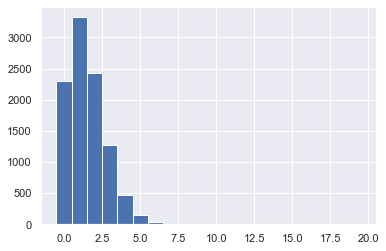

In [30]:
#Let's see the population histogram
fig=plt.hist(population,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],align="left")
population_mean=np.mean(population)
population_std=np.std(population,ddof=0)
print("Population mean is ",population_mean)
print("Population std is ",population_std)
print("Population variance is ",population_std**2)

In [26]:
#let's sample this population, with N=10 events

sample=np.random.choice(population,10)
sample

array([4, 1, 3, 1, 0, 2, 4, 0, 1, 3])

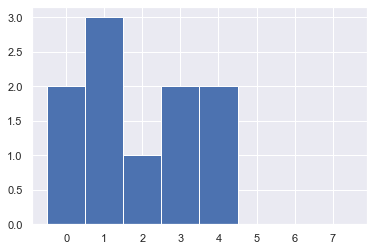

In [27]:
fig=plt.hist(sample,bins=[0,1,2,3,4,5,6,7,8],align="left")

In [18]:
#let's do ten samples like this, and calculate means
sample_size=1000
n_samples=1000
sample_means=np.zeros(n_samples)
for i in range(n_samples):
    sample=np.random.choice(population,sample_size)
    for j in range(sample_size):
        sample_means[i]+=sample[j]/sample_size
        
sample_means


array([1.489, 1.502, 1.521, 1.525, 1.494, 1.493, 1.493, 1.549, 1.452,
       1.49 , 1.43 , 1.482, 1.497, 1.52 , 1.498, 1.405, 1.516, 1.538,
       1.511, 1.521, 1.446, 1.5  , 1.46 , 1.51 , 1.484, 1.464, 1.475,
       1.487, 1.483, 1.451, 1.52 , 1.523, 1.549, 1.496, 1.478, 1.462,
       1.451, 1.492, 1.483, 1.477, 1.508, 1.49 , 1.469, 1.459, 1.49 ,
       1.506, 1.47 , 1.514, 1.477, 1.435, 1.538, 1.495, 1.497, 1.543,
       1.51 , 1.444, 1.46 , 1.469, 1.462, 1.552, 1.431, 1.469, 1.472,
       1.55 , 1.462, 1.509, 1.472, 1.464, 1.482, 1.452, 1.45 , 1.438,
       1.497, 1.441, 1.493, 1.429, 1.493, 1.531, 1.502, 1.516, 1.512,
       1.457, 1.471, 1.415, 1.469, 1.555, 1.484, 1.488, 1.452, 1.459,
       1.481, 1.497, 1.407, 1.473, 1.455, 1.484, 1.546, 1.448, 1.469,
       1.455, 1.47 , 1.436, 1.467, 1.503, 1.404, 1.494, 1.464, 1.555,
       1.527, 1.449, 1.477, 1.442, 1.461, 1.482, 1.552, 1.462, 1.477,
       1.448, 1.452, 1.49 , 1.528, 1.406, 1.457, 1.517, 1.544, 1.484,
       1.53 , 1.455,

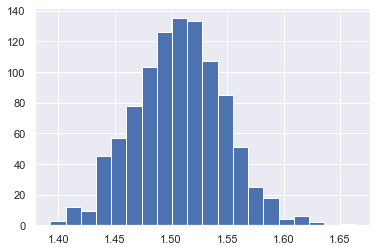

In [18]:
#Plot the distribution of means
fig=plt.hist(sample_means,bins=20)

Samples mean standard deviation is  0.03801432551025901
Calculated from the population std/sqrt(n) is  0.03860677608917896


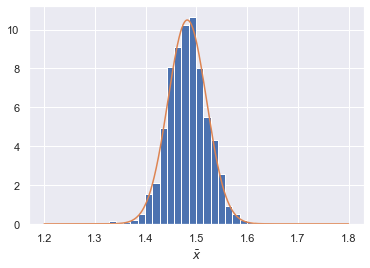

In [25]:
#Calculate the mean of means, and the standard deviation of the means
#Then plot the Normal (Gaussian) distribution with that mean and std. 
fig=plt.hist(sample_means,bins=20, density=True)

samples_mean=np.mean(sample_means)
samples_std=np.std(sample_means,ddof=0)

x=np.linspace(1.2,1.8,1000)
plt.plot(x,stats.norm.pdf(x,loc=samples_mean,scale=samples_std))
plt.xlabel(r'$\bar{x}$')
print("Samples mean standard deviation is ",samples_std)
print("Calculated from the population std/sqrt(n) is ", population_std/np.sqrt(sample_size))

## Closer look at the statistics of SAMPLE MEANS

Measure|Sample Statistic|Population Parameter|
-|-|-|
Mean|$\bar{X}$|$\mu$|
Variance|$S^2$|$\sigma^2$|
Standard Deviation|$S$|$\sigma$|

$\bf{Important}:$

The number $N$ (capital $N$ in these lectures, not everywhere) of individuals in population is typpically large. The number of individuals in a sample $n$ (lowercase) is much smaller than $N$. 

Probability is typically calculated in the limit of $N\to \infty$, or estimated over the whole population.  

## Population mean of sample means

Recall, sample mean:

$\bar{x}=\frac{\sum_{i=1}^{n}x_i}{n}$

where $n$ is the number of measurements (individuals) in a sample.

Also, the population mean is:

$\mu=<x>=\frac{\sum_{i=1}^{N}x_i}{N}$

where $N$ is the population size. (What do we do if $N\to \infty$?)

The question is, what if we take samples, calculate the means, and take the mean of the means, for a large number of samples? Not a large number of individuals in a sample, but a large number of samples?

What is $\mu_{\bar{x}}$?

$\mu_{\bar{x}}=<\bar{x}>=<\frac{1}{n}\sum_{i=1}^{n}x_i>$

$\mu_{\bar{x}}=\frac{1}{n}\sum_{i=1}^{n}<x_i>$

Note that $x_i$ are independent identically distributed variables, in other words they are a bunch of $x$. And $\mu=<x>$.

$\mu_{\bar{x}}=\frac{1}{n}\sum_{i=1}^{n}<x_i>=\frac{1}{n}\sum_{i=1}^{n}\mu=\frac{n\mu}{n}$

We have:

$\bf{\mu_{\bar{x}}=\mu}$

The mean of sample means is the same as the population mean.

## Population mean of the sample means variance (and st. dev.)

$\sigma_{\bar{x}}^2=<(\bar{x}-<\bar{x}>)^2>$

Very important to understand this definition.  
Recall that the variance of $x$ in a population is: $\sigma_{x}=<(x-<x>)^2>$ or $\sigma_{x}=<x^2>-<x>^2$


The variance of a sum of independent random variables?

$\sigma_{x_1+x_2}^2=\sigma_{x_1}^2+\sigma_{x_2}^2$

Remember that in this case $Cov(x_1,x_2)=<x_1x_2>-<x_1><x_2>=0$.

So now we can derive:

$\sigma_{\bar{x}}^2=<(\bar{x}-<\bar{x}>)^2>=<\bar{x}^2>-<2\bar{x}<\bar{x}>>+<<\bar{x}>^2>$

$\sigma_{\bar{x}}^2=<\bar{x}^2>-2<\bar{x}>^2+<\bar{x}>^2=<\bar{x}^2>-<\bar{x}>^2$

So far we have a familiar result. Let's go on:

$\sigma_{\bar{x}}^2=<(\frac{1}{n}\sum_{i=1}^nx_i)^2>-\mu^2$

$\sigma_{\bar{x}}^2=\frac{1}{n^2}<\sum_{i=1}^nx_i^2+\sum\sum_{i\neq j}^{n}x_ix_j>-\mu^2$

$\sigma_{\bar{x}}^2=\frac{1}{n^2}(n<x^2>+n(n-1)<x_ix_j>)-\mu^2$

Recall that the covariance of independent variables is zero, so:

$Cov(x_i,x_j)=<x_ix_j>-<x_i><x_j>=<x_ix_j>-\mu^2=0$

therefore:

$<x_ix_j>=\mu^2$

So we have:

$\sigma_{\bar{x}}^2=\frac{1}{n}<x^2>+\frac{n(n-1)}{n^2}\mu^2-\mu^2$

$\sigma_{\bar{x}}^2=\frac{1}{n}<x^2>-\frac{1}{n}\mu^2=\frac{<x^2>-\mu^2}{n}$

So the variance of $\bar{x}$ is:

$\sigma_{\bar{x}}^2=\frac{\sigma_x^2}{n}$

Or the standard deviation:


$\sigma_{\bar{x}}=\frac{\sigma_x}{\sqrt{n}}$

or simply:

$\sigma_{\bar{x}}=\frac{\sigma}{\sqrt{n}}$

$\sigma_{\bar{x}}$ is the $\bf{Standard\ Error}$.

Remember, $n$ is the sample size.

The coefficient of variation:

$CV=\frac{\sigma_{\bar{x}}}{\bar{x}}=\frac{1}{\sqrt{n}}\frac{\sigma}{\mu}$

Let's say that $\frac{\sigma}{\mu}=1$, and the samle size is 100:

$CV=\frac{1}{\sqrt{100}}=\frac{1}{10}=0.1$ 

or 10% error.

If $n=100000$:

$CV=\frac{1}{\sqrt{10000}}=\frac{1}{100}=0.01$

or 1% error.

## The Central Limit Theorem

What is the distribution of $\bar{x}$?

The Central Limit Theorem:

If a random variable $x$ posseses $\bf{any}$ distribution 
with a mean $\mu$ and standard deviation $\sigma$, then the sample mean $\bar{x}$
of a sample of size $n$, will have a distribution that approaches the $\bf{Normal\ Distribution}$
with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$ as $n$ grows larger (i.e. $n\to\infty$).


Note: 

If the distribution of $x$ is Normal, the CLT is valid for any $n$.

If the distribution of $x$ is not Normal, the CLT valid for $n\geq30$.

If the distribuiton of $x$ is very skewed (non-symmetric), valid for $n\geq50$. 

Let's look again at the example above.

## Normal distribution (Gaussian)

$f(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$

$\mu$ - mean

$\sigma$ - standard deviation

## Standard normal distribution
We can transform the Normal distribution with:

$z=\frac{x-\mu}{\sigma}$

The distribution of $z$ is the $\bf{Standard\ normal\ distribution}$:

$f(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{z^2}{2}}$

with:

$\mu_z=0$

and

$\sigma_z=1$

Text(0, 0.5, 'f(x)')

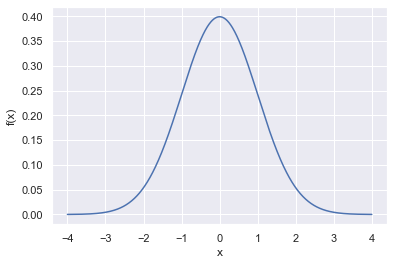

In [10]:
#Let's plot the Standard normal distribution

x=np.linspace(-4,4,1000)
std_normal_pdf=stats.norm.pdf(x)

fig=plt.plot(x,std_normal_pdf)
plt.xlabel("x")
plt.ylabel("f(x)")

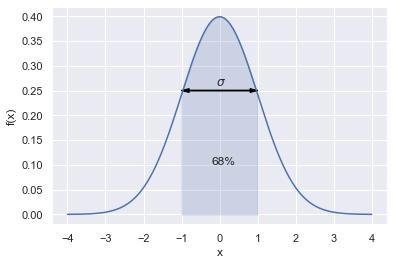

In [48]:
x=np.linspace(-4,4,1000)
std_normal_pdf=stats.norm.pdf(x)

fig=plt.plot(x,std_normal_pdf)
plt.xlabel("x")
plt.ylabel("f(x)")

t = np.arange(-4,4,1/40)
plt.fill_between(
        x= x, 
        y1= std_normal_pdf, 
        where= (-1 < x)&(x < 1),
        color= "b",
        alpha= 0.2)
        
plt.arrow(-1,0.25,2,0.0,
          shape="full",
          color="black",
          length_includes_head=True, 
          head_width=0.008,
          head_length=0.2)

plt.arrow(1,0.25,-2,0.0,
          shape="full",
          color="black",
          length_includes_head=True, 
          head_width=0.008,
          head_length=0.2)
plt.text(-0.1,0.26,r'$\sigma$')
plt.text(-0.2,0.1,'68%')
plt.show()

In [53]:
#Integral of the shaded area
integral=stats.norm.cdf(1)-stats.norm.cdf(-1)

In [54]:
#The other way around, confidence interval
stats.norm.interval(integral)

(-1.0, 1.0)

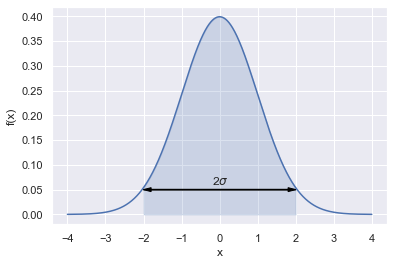

In [58]:
#How about 2\sigma?
x=np.linspace(-4,4,1000)
std_normal_pdf=stats.norm.pdf(x)

fig=plt.plot(x,std_normal_pdf)
plt.xlabel("x")
plt.ylabel("f(x)")

t = np.arange(-4,4,1/40)
plt.fill_between(
        x= x, 
        y1= std_normal_pdf, 
        where= (-2 < x)&(x < 2),
        color= "b",
        alpha= 0.2)
        
plt.arrow(-2,0.05,4,0.0,
          shape="full",
          color="black",
          length_includes_head=True, 
          head_width=0.008,
          head_length=0.2)

plt.arrow(2,0.05,-4,0.0,
          shape="full",
          color="black",
          length_includes_head=True, 
          head_width=0.008,
          head_length=0.2)
plt.text(-0.2,0.06,r'2$\sigma$')

plt.show()

In [61]:
#Integral of the shaded area
integral=stats.norm.cdf(2)-stats.norm.cdf(-2)
integral

0.9544997361036416

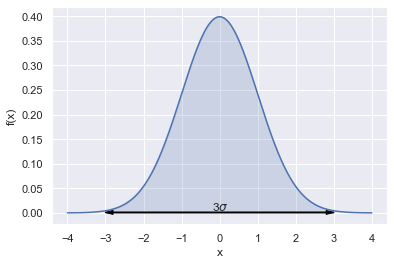

In [65]:
#How about 3\sigma?
x=np.linspace(-4,4,1000)
std_normal_pdf=stats.norm.pdf(x)

fig=plt.plot(x,std_normal_pdf)
plt.xlabel("x")
plt.ylabel("f(x)")

t = np.arange(-4,4,1/40)
plt.fill_between(
        x= x, 
        y1= std_normal_pdf, 
        where= (-3 < x)&(x < 3),
        color= "b",
        alpha= 0.2)
        
plt.arrow(-3,0.001,6,0.0,
          shape="full",
          color="black",
          length_includes_head=True, 
          head_width=0.008,
          head_length=0.2)

plt.arrow(3,0.001,-6,0.0,
          shape="full",
          color="black",
          length_includes_head=True, 
          head_width=0.008,
          head_length=0.2)
plt.text(-0.2,0.005,r'3$\sigma$')

plt.show()

In [66]:
#Integral of the shaded area
integral=stats.norm.cdf(3)-stats.norm.cdf(-3)
integral

0.9973002039367398